<a href="https://colab.research.google.com/github/ryandale7/ML-on-Graphs/blob/main/2_Basic_Network_Properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Degree Distribution and Node Degree Properties

In this section, we will:
- Understand the concept of **node degree** (in-degree, out-degree for directed graphs)  
- Explore how to compute and visualize **degree distributions**  
- Discuss what a node’s degree can tell us about its importance in a network


## 1.1 What is Node Degree?

A node’s **degree** is the number of edges connected to it.
- In an **undirected** graph, a node’s degree is simply the number of neighbors.  
- In a **directed** graph, we have:
  - **In-degree**: The number of edges coming into a node  
  - **Out-degree**: The number of edges going out of a node  

**Degree distribution**: A frequency distribution of the degrees of all nodes in the graph. By plotting this distribution, we can observe patterns such as:
- Heavy-tailed (scale-free) distributions  
- Poisson-like (random) distributions  
- Bimodal or other shapes, depending on the network structure


Degrees of each node: [4, 5, 4, 4, 1, 2, 3, 3, 3, 5]


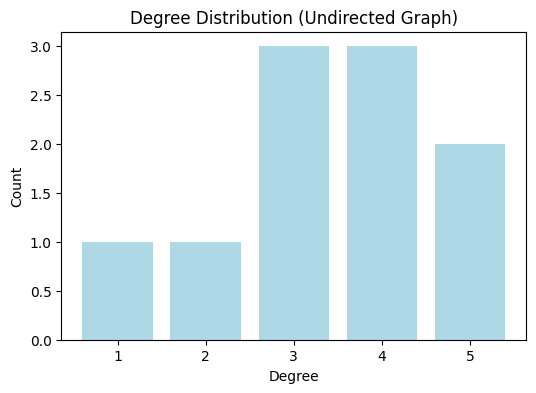

In [ ]:
# 1.2 Practice Activity: Building and Visualizing a Degree Distribution

import networkx as nx
import matplotlib.pyplot as plt

# Create a random undirected graph (Erdős–Rényi model)
# n=10 nodes, p=0.3 probability of edge creation
G = nx.erdos_renyi_graph(n=10, p=0.3, seed=42)

# Compute the degree of each node
degrees = [deg for (node, deg) in G.degree()]

print("Degrees of each node:", degrees)

# Plot the degree distribution as a histogram
plt.figure(figsize=(6, 4))
plt.hist(
    degrees,
    bins=range(min(degrees), max(degrees) + 2),
    align="left",
    rwidth=0.8,
    color="lightblue",
)
plt.title("Degree Distribution (Undirected Graph)")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

### Observations

1. Look at the printed **list of degrees** in the console output:
   - Are there any nodes with degree 0 (isolated nodes)?  
   - Which node(s) have the highest degree?

2. The **histogram** shows how many nodes have a given degree value.  
   - If most nodes have degree 1 or 2, the network is relatively sparse.  
   - If a few nodes have significantly higher degree than others, those are potentially “hubs” in the network.


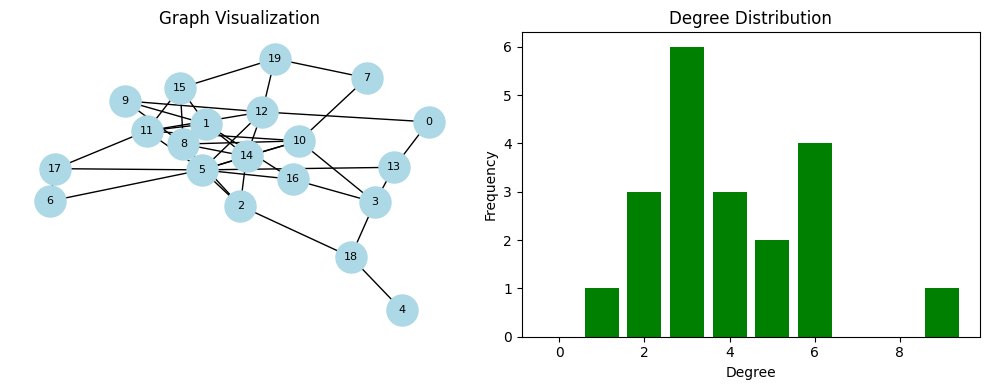

Nodes and their degrees: {0: 2, 1: 5, 2: 4, 3: 4, 4: 1, 5: 9, 6: 2, 7: 2, 8: 5, 9: 3, 10: 6, 11: 6, 12: 6, 13: 3, 14: 6, 15: 4, 16: 3, 17: 3, 18: 3, 19: 3}


In [ ]:
# Example: Calculating and Visualizing Degree Distribution
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.erdos_renyi_graph(
    20, 0.2
)  # Random graph with 20 nodes and 20% connection probability

# Calculate degrees
degrees = [deg for node, deg in G.degree()]
degree_count = nx.degree_histogram(G)  # Frequency of each degree
deg_x = range(len(degree_count))  # Degree values
deg_y = degree_count  # Count of nodes with each degree

# Visualization of the graph
plt.figure(figsize=(10, 4))

# Subplot 1: Graph Visualization
plt.subplot(1, 2, 1)
nx.draw(G, with_labels=True, node_color="lightblue", node_size=500, font_size=8)
plt.title("Graph Visualization")

# Subplot 2: Degree Distribution
plt.subplot(1, 2, 2)
plt.bar(deg_x, deg_y, color="green")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")

plt.tight_layout()
plt.show()

# Observations:
print("Nodes and their degrees:", dict(G.degree()))

### **Observations:**

1. The graph visualization shows the structure of connections between nodes.  
2. The histogram highlights the frequency of nodes with different degrees.  
3. Nodes with higher degrees may represent hubs, while nodes with degree 0 are isolated.  

---

## **Practice Activity:**

1. Create a graph with 30 nodes and a connection probability of 0.1 using NetworkX.  
2. Calculate the degree distribution and plot a histogram.  
3. Identify hubs and isolated nodes in your graph and analyze their significance.  


## 1.3 In-Degree and Out-Degree (Directed Graph Example)

Below, we’ll create a **directed** random graph using NetworkX’s `gnp_random_graph` (similar to Erdős–Rényi, but directed).
We’ll compute both in-degree and out-degree for each node.


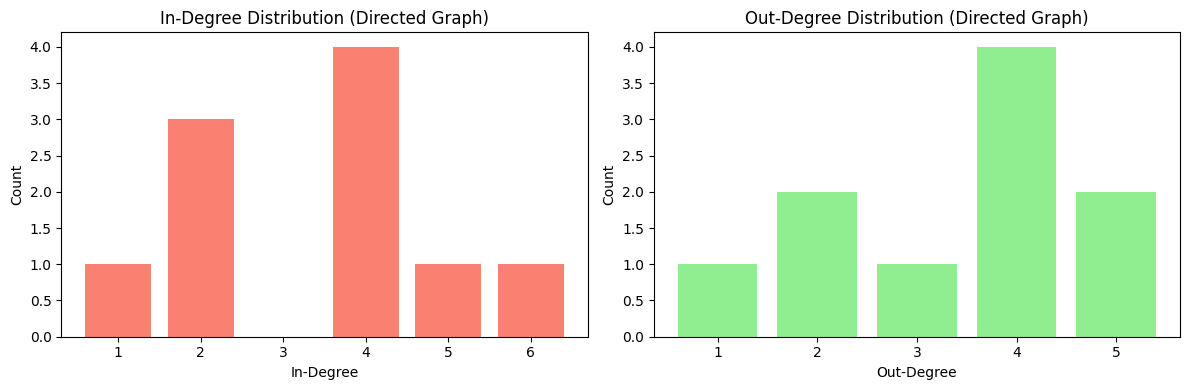

In-Degrees: [4, 2, 4, 2, 5, 1, 4, 4, 6, 2]
Out-Degrees: [4, 5, 3, 1, 4, 5, 2, 4, 2, 4]


In [ ]:
# Create a random directed graph
DG = nx.gnp_random_graph(n=10, p=0.3, directed=True, seed=42)

# Compute in-degree and out-degree
in_degrees = [DG.in_degree(node) for node in DG.nodes()]
out_degrees = [DG.out_degree(node) for node in DG.nodes()]

# Visualize in-degree distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(
    in_degrees,
    bins=range(min(in_degrees), max(in_degrees) + 2),
    align="left",
    rwidth=0.8,
    color="salmon",
)
plt.title("In-Degree Distribution (Directed Graph)")
plt.xlabel("In-Degree")
plt.ylabel("Count")

# Visualize out-degree distribution
plt.subplot(1, 2, 2)
plt.hist(
    out_degrees,
    bins=range(min(out_degrees), max(out_degrees) + 2),
    align="left",
    rwidth=0.8,
    color="lightgreen",
)
plt.title("Out-Degree Distribution (Directed Graph)")
plt.xlabel("Out-Degree")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

print("In-Degrees:", in_degrees)
print("Out-Degrees:", out_degrees)

### Observations (Directed Graph)

1. **In-degree** distribution tells you how many edges are coming into nodes. Nodes with high in-degree might be “targets” or very popular entities.  
2. **Out-degree** distribution shows how many edges go out from nodes. Nodes with high out-degree might be “sources” or very active entities.  
3. Compare the two distributions:
   - Are certain nodes high in both in-degree and out-degree?  
   - Which distribution is more skewed?


## 1.4 Practical Interpretation

- **High-degree nodes** often play critical roles (e.g., hubs in social networks, key routers in tech networks).  
- **Low-degree or isolated nodes** might represent fringe elements or potential points of vulnerability.  
- Degree distributions can hint at whether a network is:
  - **Scale-free**: Follows a power-law distribution, where few nodes have very high degree.  
  - **Random-like**: Degree distribution is closer to Poisson.  
  - **Something else** altogether.


## 1.5 Practice Activity: Degree Distribution Analysis

1. **Experiment with Graph Sizes and Probability**  
   - Increase `n` (e.g., 50, 100) and adjust `p` (e.g., 0.1, 0.5). Observe how the histogram changes.  
   - Record any patterns you notice (e.g., does the histogram become more peaked or more spread out?).

2. **Identify High-Degree Nodes**  
   - In your graph `G`, find the node(s) with the highest degree.  
   - Could these nodes be considered “hubs”?

3. **Compare Directed vs. Undirected**  
   - Create both an undirected and a directed graph with the same `(n, p)` settings.  
   - Compare in-degree, out-degree, and total degree distributions.

4. **Short Quiz**  
   - a) If a node’s degree is 0, what does that imply about its connectivity?  
   - b) In a directed graph, can a node have an out-degree of 0 but an in-degree of 5? Explain.  
   - c) What might be some **real-world** implications of finding a node with a very high degree in a network?


## 1.6 Quiz Answers (Sample Explanations)

- **a)** Degree 0 means the node is isolated—no connections to any other nodes.  
- **b)** Yes, it can. That means it receives connections from 5 other nodes but doesn’t send a connection to anyone.  
- **c)** In a social network, that node could be an influencer with many followers. In a computer network, it might be a central router. Identifying such nodes can be crucial for targeted strategies (e.g., marketing, immunization, or safeguarding against attacks).


## 1.7 Wrap-Up

- You now know how to **compute and visualize node degrees** in both undirected and directed graphs.  
- Degree distributions **provide insight** into the structure of a network and can reveal the presence of hubs or isolated nodes.  
- In subsequent sections, we’ll explore **path-based metrics**, **clustering coefficients**, and implement these metrics in greater depth using Python.


# 2. Path-Based Metrics: Shortest Paths, Average Path Length

In this section, we will:
- Explore **shortest path** concepts (unweighted vs. weighted graphs)  
- Compute **average path length** (or average shortest path)  
- Understand related metrics like **network diameter** and **eccentricity**  
- Use Python (NetworkX) to implement and visualize path-based metrics


## 2.1 Key Definitions

- **Path**: A sequence of edges which connect a sequence of distinct nodes.  
- **Path Length**: The number of edges (unweighted) or sum of edge weights (weighted) in a path.  
- **Shortest Path**: The path between two nodes that has the minimum total length (or weight).  
- **Eccentricity** (of a node): The greatest distance from that node to any other node in the network.  
- **Diameter** (of a network): The maximum eccentricity among all nodes (i.e., the longest of all the shortest paths).  
- **Radius** (of a network): The minimum eccentricity among all nodes.  
- **Average Path Length**: The average of shortest path lengths taken over all pairs of nodes in a network.


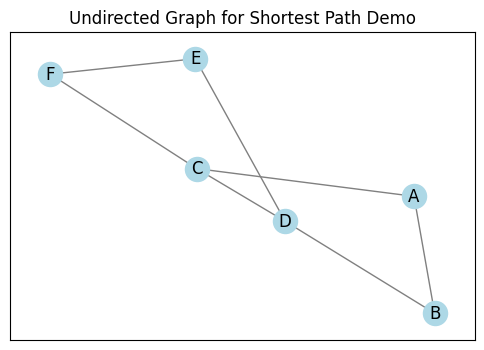

Shortest path from A to F: ['A', 'C', 'F']
Number of edges in this shortest path: 2


In [ ]:
# 2.2 Practice Activity: Building a Small Undirected Graph and Finding Shortest Paths

import networkx as nx
import matplotlib.pyplot as plt

# Create a small undirected graph
G = nx.Graph()
edges = [
    ("A", "B"),
    ("A", "C"),
    ("B", "D"),
    ("C", "D"),
    ("D", "E"),
    ("E", "F"),
    ("C", "F"),
]
G.add_edges_from(edges)

# Visualize the graph
pos = nx.spring_layout(G, seed=42)  # Position nodes for consistent layout
plt.figure(figsize=(6, 4))
nx.draw_networkx(
    G, pos=pos, with_labels=True, node_color="lightblue", edge_color="gray"
)
plt.title("Undirected Graph for Shortest Path Demo")
plt.show()

# Let's pick two nodes and compute the shortest path
source, target = "A", "F"
shortest_path = nx.shortest_path(G, source=source, target=target)
path_length = nx.shortest_path_length(G, source=source, target=target)

print(f"Shortest path from {source} to {target}: {shortest_path}")
print(f"Number of edges in this shortest path: {path_length}")

### Observations (Undirected Graph)
1. The **visualization** shows a small network of 6 nodes.  
2. By using `nx.shortest_path()`, we obtain not only the path itself but also how many edges it includes (`nx.shortest_path_length()`).  
3. Changing `source` and `target` can yield different paths and lengths.


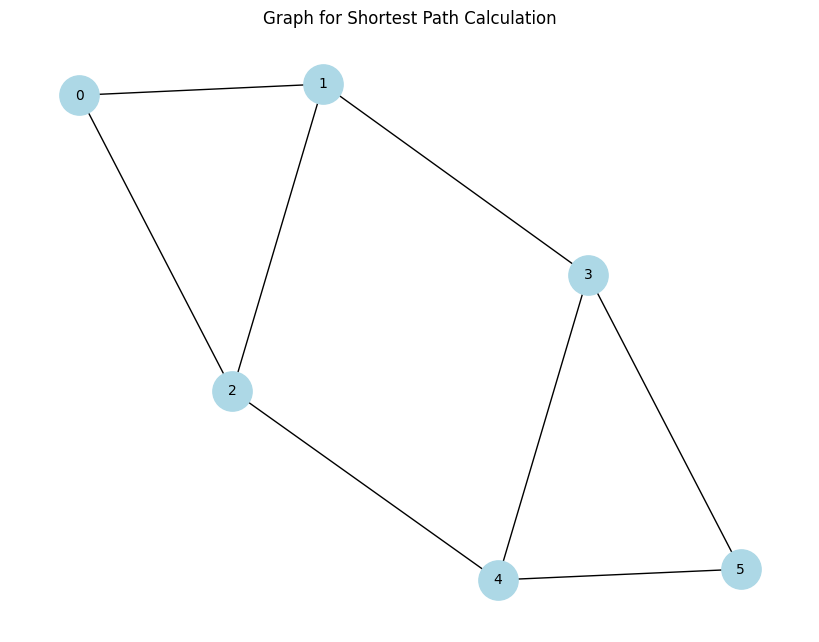

Shortest path from 0 to 5: [0, 1, 3, 5]


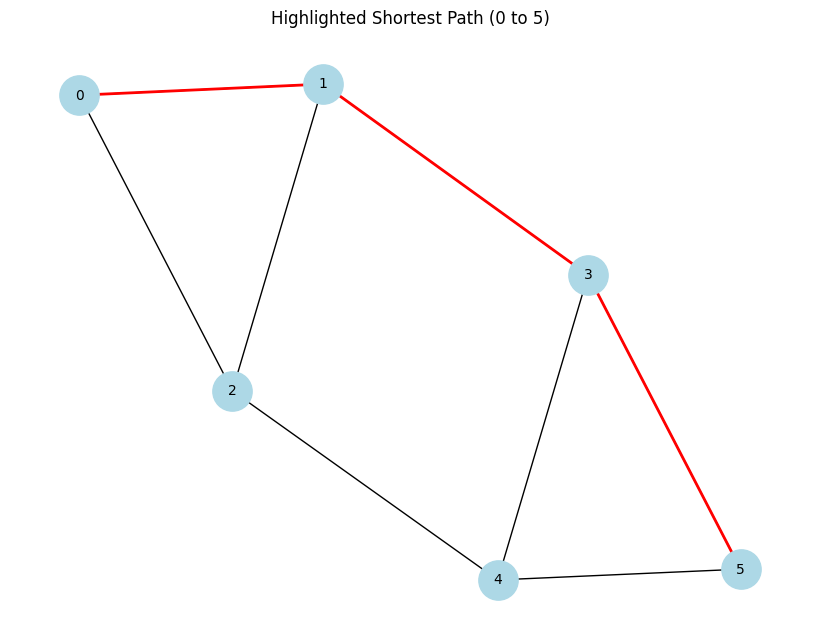

In [ ]:
# Example: Shortest Path Calculation
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 5)])

# Visualize the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800, font_size=10)
plt.title("Graph for Shortest Path Calculation")
plt.show()

# Compute shortest path
shortest_path = nx.shortest_path(G, source=0, target=5)
print("Shortest path from 0 to 5:", shortest_path)

# Highlight the shortest path
path_edges = list(zip(shortest_path, shortest_path[1:]))
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)
plt.title("Highlighted Shortest Path (0 to 5)")
plt.show()

### **Observations:**
1. The graph visualization shows the connections between nodes.  
2. The shortest path is highlighted in red, showing the most efficient route.  
3. The output confirms the sequence of nodes forming the shortest path.  

---


## 2.3 Weighted Graph Example

Here, we assign weights to edges and see how the **weighted shortest path** might differ from the unweighted case.


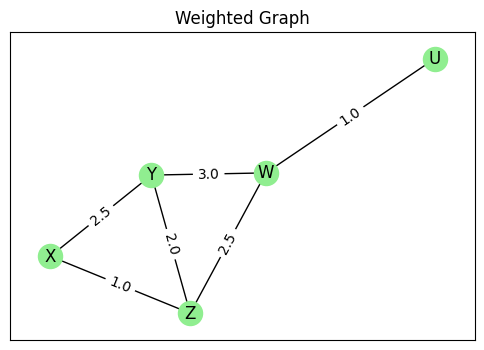

Shortest path (weighted) from X to U: ['X', 'Z', 'W', 'U']
Total weight of this shortest path: 4.5


In [ ]:
# Create a weighted undirected graph
WG = nx.Graph()
WG.add_weighted_edges_from(
    [
        ("X", "Y", 2.5),
        ("X", "Z", 1.0),
        ("Y", "Z", 2.0),
        ("Y", "W", 3.0),
        ("Z", "W", 2.5),
        ("W", "U", 1.0),
    ]
)

# Visualize the weighted graph
pos_wg = nx.spring_layout(WG, seed=42)
plt.figure(figsize=(6, 4))
nx.draw_networkx(WG, pos=pos_wg, with_labels=True, node_color="lightgreen")
edge_labels = nx.get_edge_attributes(WG, "weight")
nx.draw_networkx_edge_labels(WG, pos_wg, edge_labels=edge_labels)
plt.title("Weighted Graph")
plt.show()

# Compute the shortest path by weight
source, target = "X", "U"
shortest_weighted_path = nx.shortest_path(
    WG, source=source, target=target, weight="weight"
)
path_length_weighted = nx.shortest_path_length(
    WG, source=source, target=target, weight="weight"
)

print(f"Shortest path (weighted) from {source} to {target}: {shortest_weighted_path}")
print(f"Total weight of this shortest path: {path_length_weighted}")

### Observations (Weighted Graph)
1. **Edge Labels**: You can see each edge’s weight (e.g., 2.5, 1.0, etc.) on the plot.  
2. **Shortest Path Calculation**: `nx.shortest_path()` with `weight='weight'` finds a path that minimizes the **sum of weights**, not just the number of edges.  
3. Compare the weighted path to an unweighted approach. Sometimes the path with fewer edges is not necessarily the one with the smallest total weight.


## 2.4 Average Path Length, Diameter, and Eccentricity

We can explore **global metrics** using NetworkX:
- `nx.average_shortest_path_length(G)` (for connected graphs)  
- `nx.diameter(G)`  
- `nx.eccentricity(G)`  

Let's compute these for our first (undirected) graph `G`.


In [ ]:
# Ensure the graph is connected
# If not connected, these metrics might raise errors or only be valid on the largest component

if nx.is_connected(G):
    avg_path_len = nx.average_shortest_path_length(G)
    diam = nx.diameter(G)
    ecc = nx.eccentricity(G)

    print(f"Average Path Length: {avg_path_len:.2f}")
    print(f"Diameter: {diam}")
    print("Eccentricities:", ecc)
else:
    print(
        "Graph G is not fully connected. Average path length, diameter, and eccentricity require a connected graph."
    )

Average Path Length: 1.67
Diameter: 3
Eccentricities: {'A': 3, 'B': 3, 'C': 2, 'D': 2, 'E': 3, 'F': 3}


### Observations
1. **Average Path Length**: Gives an idea of how many “steps” (edges) it takes on average to travel between any two nodes.  
2. **Diameter**: The longest of the shortest paths in the graph. If the diameter is small, the network is said to be more “compact” or “small-world.”  
3. **Eccentricity**: Each node’s maximum distance to any other node. Nodes with low eccentricity are more centrally located.


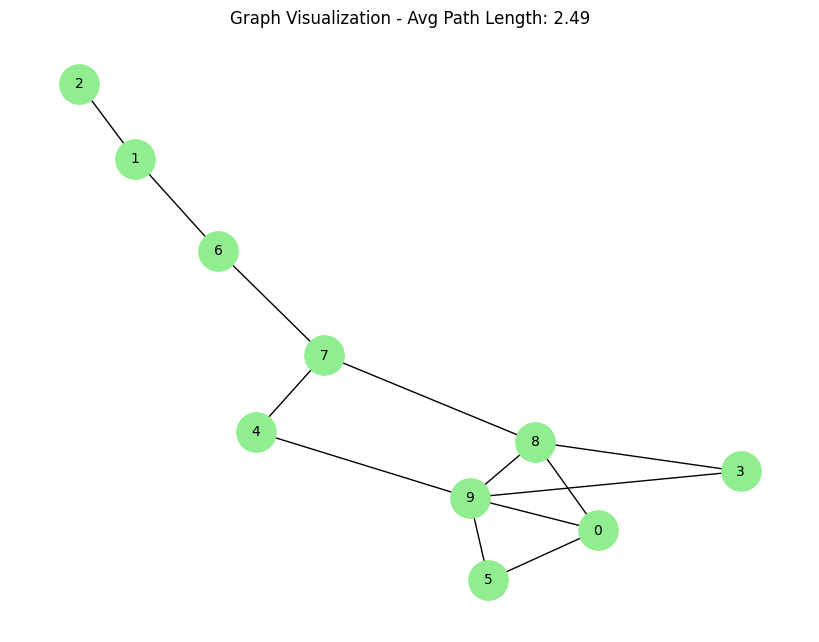

Average Path Length: 2.49


In [ ]:
# Example: Calculating Average Path Length
import networkx as nx

# Create a graph
G = nx.erdos_renyi_graph(10, 0.3)  # Random graph with 10 nodes and 30% edge probability

# Compute average path length
avg_path_length = nx.average_shortest_path_length(G)

# Visualize the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color="lightgreen", node_size=800, font_size=10)
plt.title(f"Graph Visualization - Avg Path Length: {avg_path_length:.2f}")
plt.show()

print(f"Average Path Length: {avg_path_length:.2f}")

### **Observations:**
1. The visualization shows the structure of the network.  
2. The average path length provides insights into how quickly information can spread across the network.  
3. A lower average path length often implies better connectivity.  

---


## 2.5 Practice Activities

1. **Experiment with Different Graphs**  
   - Create a larger **Erdős–Rényi** random graph (e.g., `n=10, p=0.4` or `n=15, p=0.3`) and compute:
     - Shortest path between two chosen nodes  
     - Average path length, diameter, and eccentricity (if connected)
   - If your graph isn’t fully connected, consider only the **largest connected component** by using `nx.subgraph()` or a function like `nx.connected_components()`.

2. **Directed Graph Challenge**  
   - Build a **directed** graph (DiGraph).  
   - Use `nx.shortest_path()` to find paths (directed edges) between nodes.  
   - If edges have weights, make sure to specify `weight='weight'`.

3. **Weighted Graph Analysis**  
   - For a weighted graph, compute **average shortest path length** using `weight='weight'`.  
   - Observe how different weights affect the path choices vs. an unweighted approach.

4. **Quiz**  
   - a) Define the term *diameter* of a graph.  
   - b) What is the difference between *BFS (Breadth-First Search)* and *Dijkstra’s algorithm*?  
   - c) If your graph has multiple components, how can you handle metrics like *average path length* or *diameter*?


## 2.6 Quiz Answers (Sample Explanations)

- **a)** The **diameter** is the maximum shortest path distance between any two nodes in a graph.  
- **b)** **BFS** finds shortest paths in an **unweighted** graph (or equally weighted edges), while **Dijkstra’s algorithm** handles **weighted** edges, finding the minimum cost path.  
- **c)** If your graph is **not** connected, you can either:
  1. Compute the metric for each connected component separately, or  
  2. Focus on the largest connected component.  
  3. For average path length across the entire disconnected graph, some definitions allow “infinite distance” for disconnected pairs, or you might ignore those pairs entirely.


## 2.7 Wrap-Up

- We covered **shortest path** algorithms for both unweighted and weighted graphs.  
- Explored **global metrics** like **average path length** and **diameter**, which describe how well-connected the entire network is.  
- In future sections, we’ll see how these metrics combine with **clustering** and **node-level** measures to form a deeper understanding of network structure.


# 3. Clustering Coefficient and Its Interpretation

In this section, we will:
- Define the **local** and **global** clustering coefficients  
- Compute these coefficients in Python (NetworkX)  
- Visualize and interpret clustering coefficient results for a given network  
- Relate clustering to the **small-world phenomenon** and “cliquishness” in real-world networks


## 3.1 Key Concepts

- **Local Clustering Coefficient** (LCC): For a node \( v \), it measures how many of \( v \)’s neighbors are also neighbors with each other. Formally, it’s the fraction of possible edges among \( v \)’s neighbors that actually exist.  

- **Global Clustering Coefficient**: Often defined as the average local clustering coefficient across all nodes, or sometimes via the “transitivity” metric (ratio of triangles to connected triples).  

- **Significance**:
  - High clustering indicates that nodes tend to form tightly-knit groups (many triangles).  
  - Low clustering suggests a more “tree-like” or sparse triadic structure.


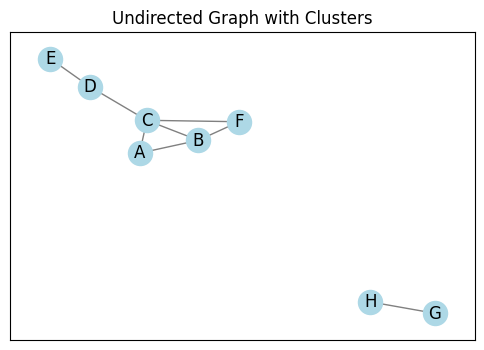

Local Clustering Coefficients:
  A: 1.00
  B: 0.67
  C: 0.33
  D: 0.00
  E: 0.00
  F: 1.00
  G: 0.00
  H: 0.00

Global Clustering Coefficient (average): 0.38


In [ ]:
# 3.2 Practice Activity: Build a Small Undirected Graph and Compute Clustering Coefficients

import networkx as nx
import matplotlib.pyplot as plt

# Create a small undirected graph with some triangles (cliques)
G = nx.Graph()
edges = [
    ("A", "B"),
    ("B", "C"),
    ("A", "C"),  # Triangle among A, B, C
    ("C", "D"),
    ("D", "E"),  # Chain out to E
    ("B", "F"),
    ("C", "F"),  # Another small cluster involving F
    ("G", "H"),  # A separate component for demonstration
]
G.add_edges_from(edges)

# Visualize the graph
pos = nx.spring_layout(G, seed=42)  # Layout for consistency
plt.figure(figsize=(6, 4))
nx.draw_networkx(
    G, pos=pos, with_labels=True, node_color="lightblue", edge_color="gray"
)
plt.title("Undirected Graph with Clusters")
plt.show()

# Compute local clustering for each node
local_clust = nx.clustering(G)
print("Local Clustering Coefficients:")
for node, coeff in local_clust.items():
    print(f"  {node}: {coeff:.2f}")

# Compute global clustering coefficient (average of local clustering)
global_clust = nx.average_clustering(G)
print(f"\nGlobal Clustering Coefficient (average): {global_clust:.2f}")

### Observations

1. **Local Clustering Coefficients**:
   - Nodes within the triangle (A, B, C) are likely to have **clustering coefficient = 1** (fully connected neighbors).  
   - Nodes at the “chain” end (e.g., D or E) often have lower clustering if their neighbors are not interconnected.

2. **Separate Component** (G, H):
   - Notice G and H are only connected to each other and not to the rest. This affects local clustering if their neighbors form no triangles.

3. **Global Clustering Coefficient**:
   - An average value near 1 indicates **high** clustering overall, while near 0 indicates **low** clustering.  
   - In real networks, typical clustering is somewhere in between, but often significantly higher than random-network expectations.


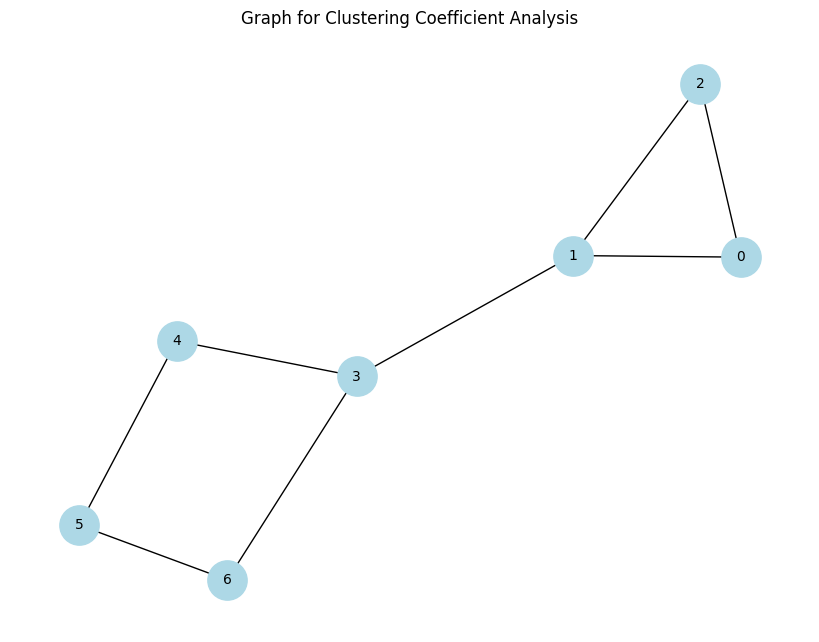

Local Clustering Coefficients: {0: 1.0, 1: 0.3333333333333333, 2: 1.0, 3: 0, 4: 0, 5: 0, 6: 0}
Global Clustering Coefficient: 0.2727272727272727


In [ ]:
# Example: Calculating Clustering Coefficient
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (3, 4), (4, 5), (5, 6), (6, 3)])

# Compute clustering coefficients
local_clustering = nx.clustering(G)  # Local clustering coefficients
global_clustering = nx.transitivity(G)  # Global clustering coefficient

# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color="lightblue", node_size=800, font_size=10)
plt.title("Graph for Clustering Coefficient Analysis")
plt.show()

print("Local Clustering Coefficients:", local_clustering)
print("Global Clustering Coefficient:", global_clustering)

### **Observations:**

1. The graph visualization highlights the connections among nodes.  
2. The **local clustering coefficient** shows how tightly connected each node's neighbors are.  
3. The **global clustering coefficient** provides a measure of the overall network cohesiveness.  



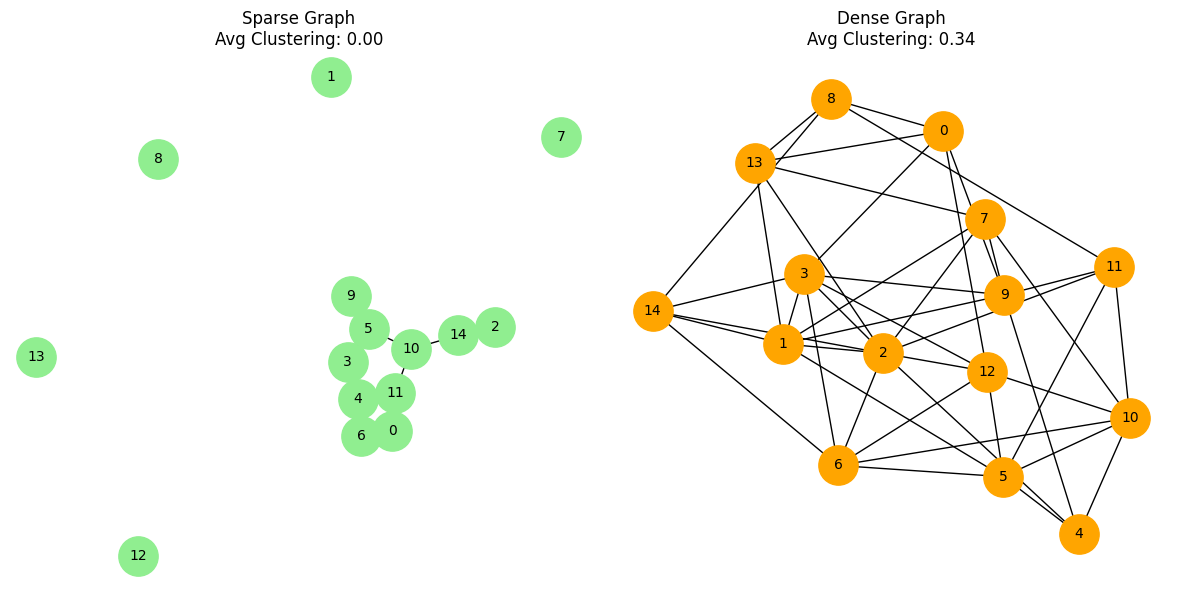

In [ ]:
# Example: Comparing Clustering in Sparse and Dense Networks
import networkx as nx
import matplotlib.pyplot as plt

# Sparse Graph
G_sparse = nx.erdos_renyi_graph(15, 0.1)  # Low edge probability
sparse_clustering = nx.average_clustering(G_sparse)

# Dense Graph
G_dense = nx.erdos_renyi_graph(15, 0.5)  # High edge probability
dense_clustering = nx.average_clustering(G_dense)

# Visualize Sparse Graph
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
nx.draw(
    G_sparse, with_labels=True, node_color="lightgreen", node_size=800, font_size=10
)
plt.title(f"Sparse Graph\nAvg Clustering: {sparse_clustering:.2f}")

# Visualize Dense Graph
plt.subplot(1, 2, 2)
nx.draw(G_dense, with_labels=True, node_color="orange", node_size=800, font_size=10)
plt.title(f"Dense Graph\nAvg Clustering: {dense_clustering:.2f}")

plt.tight_layout()
plt.show()

### **Observations:**

1. Sparse graphs have a lower clustering coefficient, indicating fewer connections among neighbors.  
2. Dense graphs exhibit higher clustering coefficients, revealing tightly-knit communities.  
3. The visualization helps compare clustering properties directly between network types.  


## 3.3 Another Example with a Random Graph

We can compare the clustering coefficient of a real or manually constructed graph to that of a random graph (Erdős–Rényi model).


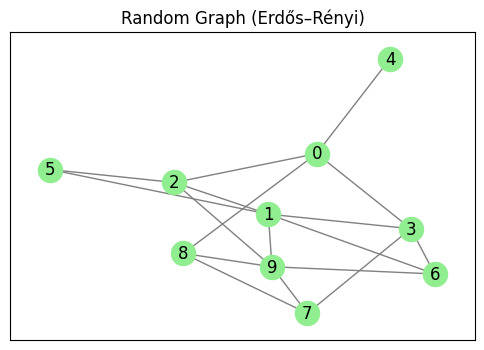

Local Clustering (Random Graph):
  0: 0.00
  1: 0.40
  2: 0.33
  3: 0.17
  4: 0.00
  5: 1.00
  6: 0.67
  7: 0.33
  8: 0.33
  9: 0.30

Global Clustering (Random Graph): 0.35


In [ ]:
# Create a random graph with 10 nodes, edge probability 0.3
RG = nx.erdos_renyi_graph(n=10, p=0.3, seed=42)

# Compute local and global clustering on the random graph
local_clust_RG = nx.clustering(RG)
global_clust_RG = nx.average_clustering(RG)

# Visualize the random graph
pos_RG = nx.spring_layout(RG, seed=42)
plt.figure(figsize=(6, 4))
nx.draw_networkx(
    RG, pos=pos_RG, with_labels=True, node_color="lightgreen", edge_color="gray"
)
plt.title("Random Graph (Erdős–Rényi)")
plt.show()

print("Local Clustering (Random Graph):")
for node, coeff in local_clust_RG.items():
    print(f"  {node}: {coeff:.2f}")

print(f"\nGlobal Clustering (Random Graph): {global_clust_RG:.2f}")

### Observations (Random Graph)
1. **Local Clustering** values typically vary: some nodes might have 0 (no or few interconnected neighbors).  
2. The **Global Clustering** is often lower than in a graph with many intentional triangles, unless \( p \) is high.  
3. As \( n \) grows large and \( p \) remains fixed, the clustering coefficient in an Erdős–Rényi graph is expected to be around \( p \).


## 3.4 Significance of Clustering in Real-World Networks

- **Social Networks**: High clustering due to “friend-of-a-friend” ties.  
- **Biological Networks**: Proteins in the same functional group often have higher clustering.  
- **Technological Networks**: Certain network topologies (e.g., mesh networks) can exhibit moderate or high clustering.

**Small-World Phenomenon** (Watts–Strogatz model):
- High clustering + low average path length
- Common in many real-world networks (people, power grids, neuronal networks, etc.)


## 3.5 Practice Activities

1. **Custom Graph**  
   - Build your own undirected graph with at least 8 nodes. Include at least one triangle or complete subgraph.  
   - Compute the local clustering for each node and the global clustering.  
   - Visualize the graph and identify which nodes have the highest clustering.

2. **Comparative Analysis**  
   - Compare **average clustering** between your custom graph and a random graph of the same size (same number of nodes, similar edge count).  
   - Which one has a higher global clustering?

3. **Directed Graph Variation**  
   - Note that **NetworkX** has a function `nx.clustering` for undirected graphs. For directed graphs, you might look into `nx.algorithms.cluster.clustering` (it’s generally for undirected, but can also compute a directed version if needed).  
   - Try building a directed graph and see how clustering is defined or computed.

4. **Quiz**  
   - a) What does a local clustering coefficient of 1 imply for a node’s neighbors?  
   - b) How does the global clustering coefficient relate to local clustering values?  
   - c) Why might social networks tend to have higher clustering than random graphs?


## 3.6 Sample Quiz Answers

- **a)** Local clustering = 1 means **all** neighbors of that node are also interconnected (forming a complete subgraph among those neighbors).  
- **b)** The global clustering coefficient is often the **average** of all nodes’ local clustering coefficients (or the ratio of triangles to connected triples in the entire graph, depending on the definition).  
- **c)** In social networks, people often form close groups or communities, leading to a higher probability that a friend of a friend is also a friend—thus increasing clustering.


## 3.7 Wrap-Up

- We learned how to compute **local** and **global** clustering using NetworkX.  
- Clustering coefficients help reveal the “cliquishness” or presence of **triadic closures**.  
- High clustering is often associated with **small-world** properties, especially when combined with a relatively short average path length.  
- Next, we’ll see how to implement these metrics together or apply them to larger, real-world datasets.


# 4. Hands-On Implementation of Metrics Using Python Libraries

In this section, we will:
- **Combine** degree, path-based, and clustering metrics in one workflow  
- **Generate** or load a sample network and compute all key metrics  
- **Visualize** results (e.g., histograms, network plots)  
- **Discuss** interpretations of these metrics in a unified context


## 4.1 Environment Setup and Imports

We’ll use:
- **NetworkX** for creating and analyzing graphs  
- **Matplotlib** for visualization


In [ ]:
pip install seaborn

In [ ]:
pip install seaborn

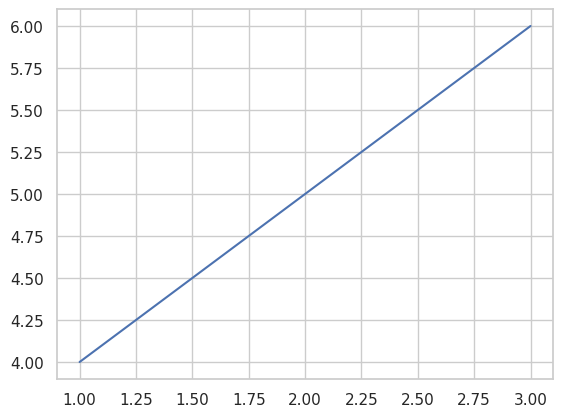

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Example plot
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


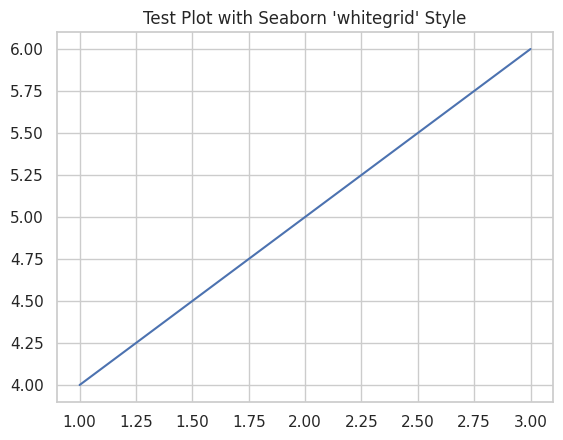

In [ ]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# For inline plotting in Jupyter
%matplotlib inline

# Set the Seaborn theme to 'whitegrid'
sns.set_theme(style="whitegrid")

# Quick example plot to confirm the style
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Test Plot with Seaborn 'whitegrid' Style")
plt.show()

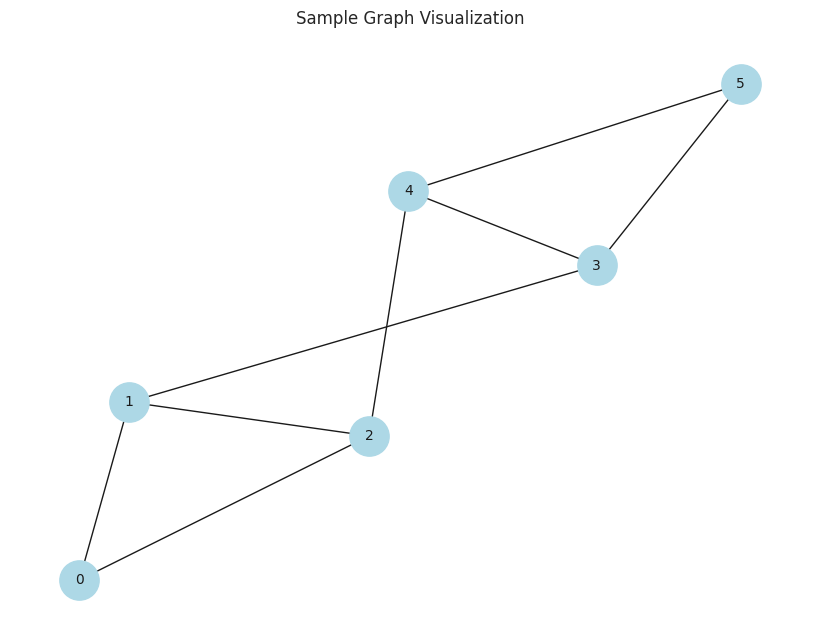

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 5)])

# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color="lightblue", node_size=800, font_size=10)
plt.title("Sample Graph Visualization")
plt.show()

### **Observations:**

1. The graph visualization shows the network structure, with nodes and edges clearly visible.  
2. This forms the foundation for analyzing network metrics.  


## 4.2 Building or Loading a Network

In this section, we will:
- Demonstrate how to build or load a graph (for instance, a random graph or a real dataset)
- Visualize the network structure
- Briefly explore basic properties (number of nodes, edges, connectivity)


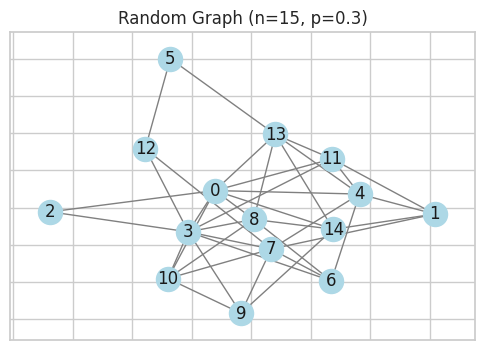

Number of nodes: 15
Number of edges: 38
The graph is fully connected.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# We assume Section 4.1 already set up Seaborn's theme:
# sns.set_theme(style="whitegrid")

###############################################################################
# 4.2 EXAMPLE 1: Creating a Random Graph (Erdős–Rényi)
###############################################################################

# Create an Erdős–Rényi random graph with 15 nodes and edge probability 0.3
G = nx.erdos_renyi_graph(n=15, p=0.3, seed=42)

# Visualize the graph
pos = nx.spring_layout(G, seed=42)  # Positions for consistent layout
plt.figure(figsize=(6, 4))
nx.draw_networkx(
    G, pos=pos, with_labels=True, node_color="lightblue", edge_color="gray"
)
plt.title("Random Graph (n=15, p=0.3)")
plt.show()

# Quick info
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Check connectivity
if nx.is_connected(G):
    print("The graph is fully connected.")
else:
    print("The graph is NOT fully connected.")

### Observations (Random Graph)
1. **Number of Edges**: The number of edges depends on `p=0.3` and the random seed. You may see a slightly different structure if you change the random seed or probability.  
2. **Connectivity**: Erdős–Rényi graphs aren’t guaranteed to be connected. If it isn’t connected, some metrics (e.g., diameter) need to be computed on the largest connected component.


```
# This is formatted as code
```



## 4.2.1 Quick Checks and Explorations

Whether you built a random graph or loaded a real dataset, it’s useful to do some quick checks:
- Number of nodes and edges  
- Connected or disconnected? (e.g., `nx.is_connected()`)  
- Any isolated nodes? (degree 0)  
- Basic plotting to see overall structure


In [ ]:
# Example: Identify isolated nodes (degree 0)
isolated_nodes = [n for n, deg in G.degree() if deg == 0]

if isolated_nodes:
    print("Isolated nodes:", isolated_nodes)
else:
    print("No isolated nodes in this graph.")

No isolated nodes in this graph.


### Observations (Checks and Explorations)
- **Isolated Nodes**: If you find nodes with degree 0, they can’t reach or be reached from other nodes in an undirected graph.  
- **Basic Plot**: The spring layout can reveal if there’s a main cluster plus outliers or separate components.


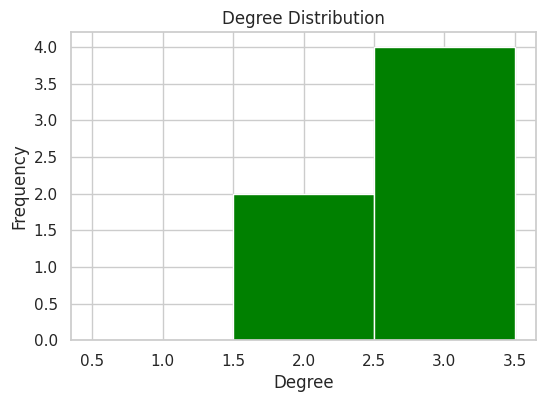

Degrees of Nodes: {0: 2, 1: 3, 2: 3, 3: 3, 4: 3, 5: 2}


In [ ]:
# Degree distribution
degrees = [deg for node, deg in G.degree()]
plt.figure(figsize=(6, 4))
plt.hist(degrees, bins=range(1, max(degrees) + 2), align="left", color="green")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.grid(True)
plt.show()

print("Degrees of Nodes:", dict(G.degree()))

### **Observations:**

1. The histogram provides insights into the degree distribution of the graph.  
2. Higher frequency near lower degrees suggests a random or sparse network structure.  



In [ ]:
# Shortest path from node 0 to 5
shortest_path = nx.shortest_path(G, source=0, target=5)
print("Shortest path from 0 to 5:", shortest_path)

# Average path length
avg_path_length = nx.average_shortest_path_length(G)
print("Average Path Length:", avg_path_length)

Shortest path from 0 to 5: [0, 1, 3, 5]
Average Path Length: 1.5333333333333334


### **Observations:**

1. The shortest path shows the sequence of nodes with minimal hops.  
2. The average path length quantifies how efficiently information travels across the graph.  

---

**Step 4: Compute Clustering Coefficients**


In [ ]:
# Clustering coefficients
local_clustering = nx.clustering(G)  # Local clustering coefficient
global_clustering = nx.transitivity(G)  # Global clustering coefficient

print("Local Clustering Coefficients:", local_clustering)
print("Global Clustering Coefficient:", global_clustering)

Local Clustering Coefficients: {0: 1.0, 1: 0.3333333333333333, 2: 0.3333333333333333, 3: 0.3333333333333333, 4: 0.3333333333333333, 5: 1.0}
Global Clustering Coefficient: 0.42857142857142855


### **Observations:**

1. Local clustering coefficients reveal how tightly connected each node’s neighbors are.  
2. The global clustering coefficient provides a holistic measure of network cohesiveness.  

---

**Step 5: Visualize Key Metrics on the Graph**


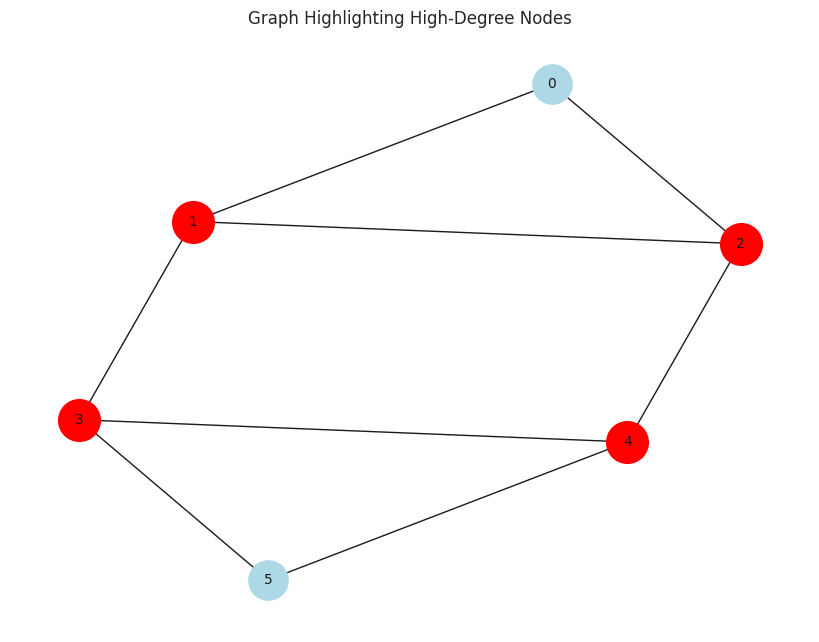

In [ ]:
# Highlight nodes with highest degree
high_degree_nodes = [node for node, degree in G.degree() if degree == max(degrees)]
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))

# Draw nodes and highlight high-degree nodes
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800, font_size=10)
nx.draw_networkx_nodes(
    G, pos, nodelist=high_degree_nodes, node_color="red", node_size=900
)

plt.title("Graph Highlighting High-Degree Nodes")
plt.show()

### **Observations:**

1. Nodes with the highest degrees are highlighted, showing their importance in the network.  
2. These nodes might act as hubs for information flow.  

---

## **Practice Activity:**

1. Create a new graph with 20 nodes and a connection probability of 0.3.  
2. Compute and visualize the following metrics:  
   - Degree distribution  
   - Shortest path and average path length  
   - Clustering coefficients (local and global)  
3. Highlight important nodes based on their centrality or degree.  


# Real-Life Example: Bitcoin OTC Trust Weighted Signed Network

For **Unit 2** (Basic Network Properties), we’ll use a **Bitcoin OTC trust network**. This dataset comes from a platform called **Bitcoin OTC**, where users can rate one another on a scale from **-10 (total distrust)** to **+10 (total trust)**. The result is a **weighted, signed, directed** graph—an excellent example for exploring degree properties, paths, clustering, and more.

**Dataset**: “soc-sign-bitcoinotc.csv”  
https://snap.stanford.edu/data/soc-sign-bitcoin-otc.html
- **Nodes**: Anonymous users trading Bitcoin.  
- **Edges**: A directed edge \(u \rightarrow v\) exists if \(u\) has provided a trust/distrust rating for \(v\).  
- **Weights**: An integer from \(-10\) to \(+10\) indicating the level of trust (negative = distrust, positive = trust).

Below is an example workflow in **Google Colab** showcasing how to:
1. Load the dataset.
2. Compute and visualize fundamental network properties (degree distribution, shortest paths, average path length, and clustering).
3. Briefly interpret the findings.

---

## 1. Environment and Data Setup


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 1. Mount Google Drive (if needed)
from google.colab import drive

drive.mount("/content/drive")

# 2. Navigate to the data folder
%cd /content/drive/MyDrive/Colab\ Notebooks/Data/

# 3. Load the Bitcoin OTC trust dataset (assuming it's named soc-sign-bitcoinotc.csv)
df = pd.read_csv("soc-sign-bitcoinotc.csv", header=None)
df.columns = ["source", "target", "rating", "time"]  # typical columns in this dataset

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Data



### Dataset Preview
The DataFrame `df` should have columns:
- `source`: user ID giving the rating
- `target`: user ID receiving the rating
- `rating`: an integer from -10 to +10
- `time`: timestamp (optional for our current analysis)

We’ll now build a **directed** graph with **weighted, signed edges**.


In [ ]:
G = nx.DiGraph()

# Add edges from the DataFrame
# For each row, 'source' -> 'target' with an edge weight = 'rating'
for _, row in df.iterrows():
    src = row["source"]
    dst = row["target"]
    w = row["rating"]
    # We store the rating in the 'weight' attribute
    G.add_edge(src, dst, weight=w)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 5881
Number of edges: 35592



### Observations

- **Nodes** represent individual users on the Bitcoin OTC platform.  
- **Edges** represent trust or distrust scores (from -10 to +10).  
- This is a **directed** graph because user A’s rating of user B doesn’t imply user B rates user A.

We’ll now explore **basic network properties** like **degree distribution**, **path-based metrics**, and **clustering**.


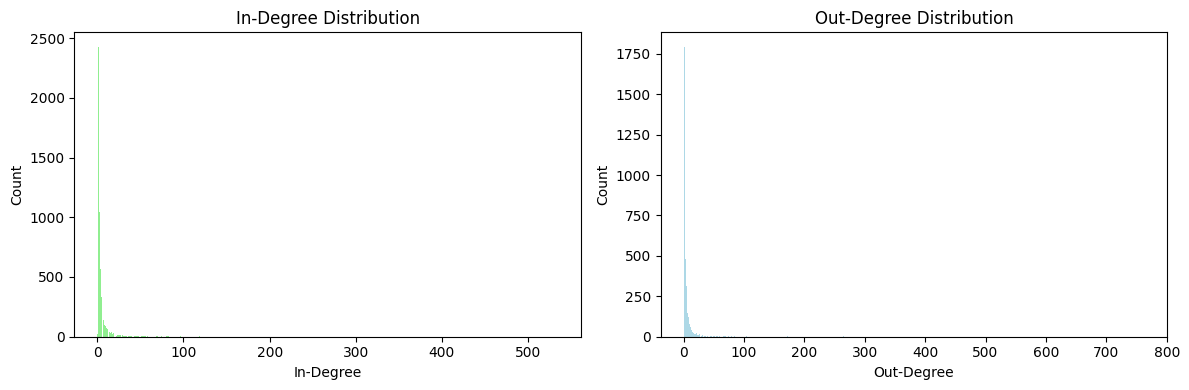

Average in-degree: 6.052031967352491
Average out-degree: 6.052031967352491


In [ ]:
# In-degree and out-degree
in_degrees = [val for (_, val) in G.in_degree()]
out_degrees = [val for (_, val) in G.out_degree()]

# Histograms
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=range(0, max(in_degrees) + 1), color="lightgreen", rwidth=0.8)
plt.title("In-Degree Distribution")
plt.xlabel("In-Degree")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(
    out_degrees, bins=range(0, max(out_degrees) + 1), color="lightblue", rwidth=0.8
)
plt.title("Out-Degree Distribution")
plt.xlabel("Out-Degree")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Quick stats
print("Average in-degree:", sum(in_degrees) / len(in_degrees))
print("Average out-degree:", sum(out_degrees) / len(out_degrees))


### Observations (Degree Distribution)
1. **In-Degree**: How many incoming trust ratings each user receives. Some users may be rated by many others.  
2. **Out-Degree**: How many distinct ratings a user gives to others.  
3. In real user-generated networks, degree distributions may be **skewed** (few users with very high degree).

---

## 4. Path-Based Metrics: Shortest Paths, Average Path Length


In [ ]:
# Because it's potentially large and possibly disconnected,
# we'll focus on the largest weakly connected component (WCC)
# for path-based metrics in a directed graph.
if nx.is_empty(G):
    print("Graph is empty!")
else:
    # Extract largest weakly connected component (for a directed graph)
    wccs = list(nx.weakly_connected_components(G))
    largest_wcc = max(wccs, key=len)
    H = G.subgraph(largest_wcc).copy()

    print("Size of the largest weakly connected component:", H.number_of_nodes())

    # If the subgraph is still large, we might skip certain computations or only sample.
    if H.number_of_nodes() < 5000:  # arbitrary threshold for demonstration
        # Compute average shortest path length for the subgraph
        avg_path_len = nx.average_shortest_path_length(H)
        print(f"Average shortest path length (Largest WCC): {avg_path_len:.2f}")

        # Potentially, we can also check diameter (longest of the shortest paths)
        diam = nx.diameter(H)
        print(f"Diameter (Largest WCC): {diam}")
    else:
        print("Subgraph too large for average path length or diameter demonstration.")

Size of the largest weakly connected component: 5875
Subgraph too large for average path length or diameter demonstration.



### Observations (Paths)
- **Weakly Connected Component**: In a directed graph, a WCC is where each node is reachable from any other if we ignore edge direction.  
- **Average Path Length**: Indicates how many “steps” on average separate two users.  
- **Diameter**: The maximum distance among all shortest paths—useful for checking how “wide” the network is.  
- Large networks can be computationally heavy, so sampling or focusing on subgraphs is often necessary.

---

## 5. Clustering Coefficient (Signed Graph Considerations)


In [ ]:
# NetworkX's default clustering methods are for undirected graphs.
# For a directed graph, we can still compute the 'clustering' via G.to_undirected()
# But it won't account for sign (positive/negative edges).
# We'll do a quick demonstration ignoring the sign for now.

U = H.to_undirected()

# Calculate average clustering on the largest WCC (as an undirected view)
avg_clust = nx.average_clustering(U)
print(f"Average clustering (undirected view): {avg_clust:.2f}")

# For a local view, let's compute the clustering of a few random nodes
import random

sample_nodes = random.sample(list(U.nodes()), min(5, U.number_of_nodes()))
for node in sample_nodes:
    print(f"Local clustering of {node}:", nx.clustering(U, node))

Average clustering (undirected view): 0.18
Local clustering of 3564.0: 0.6666666666666666
Local clustering of 4379.0: 0.36363636363636365
Local clustering of 806.0: 0
Local clustering of 3230.0: 1.0
Local clustering of 4051.0: 0



### Observations (Clustering)
1. **Ignoring Edge Sign**: Standard clustering calculations generally focus on whether nodes are connected, not the weight/sign.  
2. **Interpreting**: A higher clustering coefficient often indicates tighter “triangles” (people rating each other).  
3. **Signed Graph**: If we want truly signed clustering measures, we may need specialized algorithms or libraries that handle negative edges differently.

---

## 6. Quick Visualization (Optional Small Subset)


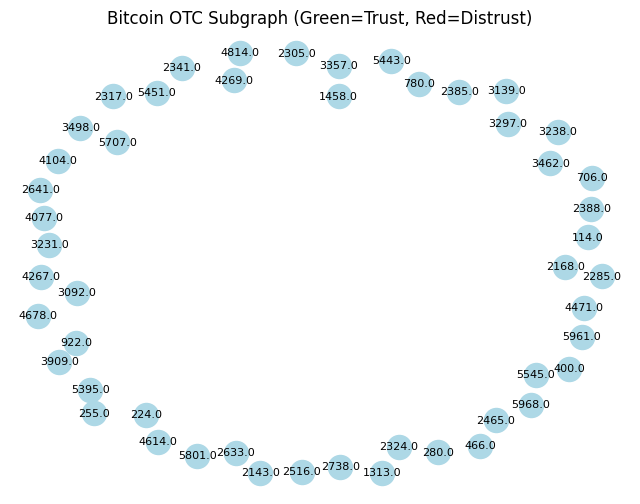

In [ ]:
import random

# Let's pick a small subset of nodes to visualize.
if H.number_of_nodes() > 50:
    # randomly pick 50 nodes
    sub_nodes = random.sample(list(H.nodes()), 50)
    subgraph = H.subgraph(sub_nodes).copy()
else:
    subgraph = H  # if it's already small enough

pos = nx.spring_layout(subgraph, seed=42)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(subgraph, pos=pos, node_color="lightblue")
# We'll color edges by their weight sign (positive vs negative)
pos_edges = [(u, v) for (u, v, w) in subgraph.edges(data="weight") if w > 0]
neg_edges = [(u, v) for (u, v, w) in subgraph.edges(data="weight") if w < 0]

nx.draw_networkx_edges(
    subgraph, pos=pos, edgelist=pos_edges, edge_color="green", arrows=True
)
nx.draw_networkx_edges(
    subgraph, pos=pos, edgelist=neg_edges, edge_color="red", arrows=True
)
nx.draw_networkx_labels(subgraph, pos=pos, font_size=8)

plt.title("Bitcoin OTC Subgraph (Green=Trust, Red=Distrust)")
plt.axis("off")
plt.show()


### Observations (Visualization)
- **Green edges** represent positive trust scores, while **red edges** indicate negative (distrust).  
- Even a small subgraph may reveal interesting clusters or individuals with mixed trust/distrust edges.

---

## 7. Summary

This **Bitcoin OTC weighted signed network** is an ideal **real-life example** for:
- **Degree Distribution**: Trust out-degree (how many users a person rates) vs. in-degree (how many ratings they receive).  
- **Path-Based Metrics**: Checking average path length or diameter, focusing on the largest weakly connected component.  
- **Clustering Coefficient**: For a quick look at triadic closure, though sign-specific analysis would require advanced methods.  
- **Visualization**: Distinguishing positive vs. negative edges can highlight trust clusters vs. potential conflicts.



---

## **Quiz:**

1. How is the degree distribution useful in understanding the structure of a graph?  
2. What does the clustering coefficient reveal about a network?  
3. How can shortest path length influence the performance of communication networks?  


## 4.2.2 Next Steps

Now that we have a network in place (either random or real-world), we can proceed with:
- **Computing Metrics**: Degree, path-based, clustering, etc.  
- **Visualizing** distributions (e.g., degree histograms).  
- **Interpreting** whether the graph is connected, small-world, or has any special structures.

In the following sections, we’ll apply the **metrics** we’ve discussed—tying everything together in a hands-on manner.
